**Analisis Data Brazilian E-Commerce Public Dataset**

Dataset: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

# **Pertanyaan Bisnis**

1. Bagaimana segmentasi pasar berdasarkan wilayah geografis?
2. Kategori barang apa yang paling sering dibeli oleh pelanggan, dan bagaimana solusi terhadap kategori produk yang paling jarang dibeli?
3. Pada bulan apa terjadi peningkatan pembelian tertinggi oleh pelanggan dan apa yang mungkin menyebabkan hal itu dapat terjadi?
4. Tipe pembayaran apa yang paling sering atau disukai oleh pelanggan saat melakukan transaksi dan bagaimana peningkatan layanan tersebut agar pelanggan lebih nyaman dalam melakukan transaksi?

# **Menyiapkan Library yang Dibutuhkan**

In [1]:
# Impor library
import os
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import warnings
from google.colab import files

In [2]:
!pip install -q kaggle

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fauzanbyu","key":"6315917ff5833a191af787ea7c399e2b"}'}

# **Data Wrangling**

## **Gathering Data**

In [4]:
# Memuat dataset
!mkdir BrazilianEcommerce
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d olistbr/brazilian-ecommerce -p /content/BrazilianEcommerce/

 84% 36.0M/42.6M [00:00<00:00, 130MB/s] 
100% 42.6M/42.6M [00:00<00:00, 126MB/s]


In [5]:
# Ekstraksi dataset
!unzip '/content/BrazilianEcommerce/brazilian-ecommerce.zip' -d /content/BrazilianEcommerce/

Archive:  /content/BrazilianEcommerce/brazilian-ecommerce.zip
  inflating: /content/BrazilianEcommerce/olist_customers_dataset.csv  
  inflating: /content/BrazilianEcommerce/olist_geolocation_dataset.csv  
  inflating: /content/BrazilianEcommerce/olist_order_items_dataset.csv  
  inflating: /content/BrazilianEcommerce/olist_order_payments_dataset.csv  
  inflating: /content/BrazilianEcommerce/olist_order_reviews_dataset.csv  
  inflating: /content/BrazilianEcommerce/olist_orders_dataset.csv  
  inflating: /content/BrazilianEcommerce/olist_products_dataset.csv  
  inflating: /content/BrazilianEcommerce/olist_sellers_dataset.csv  
  inflating: /content/BrazilianEcommerce/product_category_name_translation.csv  


### **Geolocation**

In [6]:
# Membaca file CSV dari lokasi dataset
geolocation = pd.read_csv('/content/BrazilianEcommerce/olist_geolocation_dataset.csv')
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### **Customer**

In [7]:
customer = pd.read_csv('/content/BrazilianEcommerce/olist_customers_dataset.csv')
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### **Product Category**

In [8]:
product_category = pd.read_csv('/content/BrazilianEcommerce/product_category_name_translation.csv')
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### **Products**

In [9]:
products = pd.read_csv('/content/BrazilianEcommerce/olist_products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Data Product Category dan data Products memiliki informasi yang saling berkaitan, maka dari itu kedua data tersebut akan digabungkan menjadi satu dataframe dan disimpan kedalam variabel merged_products.

In [10]:
# Melakukan merge dari data 'product_category' ke data 'products'
merged_products = products.merge(product_category[['product_category_name', 'product_category_name_english']], on='product_category_name', how='left')[["product_id", "product_category_name_english", "product_category_name"]]
merged_products.head()

,product_id,product_category_name_english,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,art,artes
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,baby,bebes
4,9dc1a7de274444849c219cff195d0b71,housewares,utilidades_domesticas


### **Orders**

In [11]:
# Membaca file CSV dari lokasi dataset
orders = pd.read_csv('/content/BrazilianEcommerce/olist_orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### **Order Items**

In [12]:
order_items = pd.read_csv('/content/BrazilianEcommerce/olist_order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Data Order Items juga memiliki informasi penting dengan data Product Category dan data Products, maka dari itu data Order Items akan digabungkan dengan data merged_products menjadi satu dataframe dan menyimpannya dalam variabel merged_order_items.

In [13]:
# Menggabungkan data 'order_items' ke data 'merged_products'
merged_order_items = order_items.merge(merged_products, on='product_id', how='left')
merged_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,ferramentas_jardim


### **Order Payments**

In [14]:
# Membaca file CSV dari lokasi dataset
order_payments = pd.read_csv('/content/BrazilianEcommerce/olist_order_payments_dataset.csv')
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


## **Assessing Data**

### **Geolocation**

In [15]:
# Mengecek tipe data
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [16]:
# Mengecek missing value
geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Diketahui dari output diatas bahwa tidak terdapat missing value pada data Geolocation.

In [17]:
# Mengecek data duplikat
geolocation.duplicated().sum()

261831

Dari output diatas diketahui terdapat 261831 data duplikat, hal ini akan diatasi pada tahap Data Cleaning.

In [18]:
# Mengecek distribusi data
geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


### **Customer**

In [19]:
# Mengecek tipe data
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [20]:
# Mengecek missing value
customer.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [21]:
# Mengecek data duplikat
customer.duplicated().sum()

0

In [22]:
# Mengecek distribusi data
customer.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


### **Product Category**

In [23]:
# Mengecek tipe data
product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [24]:
# Mengecek missing value
product_category.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [25]:
# Mengecek data duplikat
product_category.duplicated().sum()

0

In [26]:
# Mengecek distribusi data
product_category.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### **Products**

In [27]:
# Mengecek tipe data pada 'merged_products'
merged_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_id                     32951 non-null  object
 1   product_category_name_english  32328 non-null  object
 2   product_category_name          32341 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


In [28]:
# Mengecek missing value pada 'merged_products'
merged_products.isna().sum()

product_id                         0
product_category_name_english    623
product_category_name            610
dtype: int64

Dari output diatas terdapat missing value sebanyak 623 pada fitur 'product_category_name_english' dan 610 missing value pada fitur 'product_category_name', masalah ini juga akan ditangani pada tahap Data Cleaning.

In [29]:
# Mengecek data duplikat pada 'merged_products'
merged_products.duplicated().sum()

0

In [30]:
# Mengecek distribusi data pada 'merged_products'
merged_products.describe()

,product_id,product_category_name_english,product_category_name
count,32951,32328,32341
unique,32951,71,73
top,1e9e8ef04dbcff4541ed26657ea517e5,bed_bath_table,cama_mesa_banho
freq,1,3029,3029


### **Orders**

In [31]:
# Mengecek tipe data
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Berdasarkan output diatas, terdapat tipe data yang tidak sesuai, yaitu pada kolom ke-3 hingga ke-7 yang seharusnya memiliki tipe data timestamp. Masalah ini akan ditangani pada tahap Data Cleaning.

In [32]:
# Mengecek missing value
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Dari output diatas didapatkan 3 fitur yang memiliki missing value, yaitu 'order_approved_at', 'order_delivered_carrier_date', dan 'order_estimated_delivery_date'.

In [33]:
# Mengecek data duplikat
orders.duplicated().sum()

0

In [34]:
# Mengecek distribusi data
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### **Order Items**

In [35]:
# Mengecek tipe data pada 'merged_order_items'
merged_order_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_category_name_english  111023 non-null  object 
 8   product_category_name          111047 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 8.6+ MB


Pada output diatas juga terdapat tipe data yang tidak sesuai, yaitu pada kolom ke-4 yang seharusnya memiliki tipe data timestamp. Masalah ini juga akan ditangani pada tahap Data Cleaning.

In [36]:
# Mengecek missing value pada 'merged_order_items'
merged_order_items.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name_english    1627
product_category_name            1603
dtype: int64

Didapatkan missing value pada 2 fitur, yaitu 'product_category_name_english' dan 'product_category_name_english'.

In [37]:
# Mengecek data duplikat pada 'merged_order_items'
merged_order_items.duplicated().sum()

0

In [38]:
# Mengecek distribusi data pada 'merged_order_items'
merged_order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### **Order Payments**

In [39]:
# Mengecek tipe data pada data 'order_payments'
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [40]:
# Mengecek missing value pada data 'order_payments'
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [41]:
# Mengecek data duplikat pada data 'order_payments'
order_payments.duplicated().sum()

0

In [42]:
# Mengecek distribusi data pada data 'order_payments'
order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


## **Data Cleaning**

### **Menangani Missing Value**

Pada tahap Assessing Data, terdapat missing value pada data 'merged_products' dan 'orders'

In [43]:
# Melihat missing value pada data 'merged_products'
merged_products.isna().sum()

product_id                         0
product_category_name_english    623
product_category_name            610
dtype: int64

In [44]:
# Melakukan drop pada missing value pada data 'merged_products'
merged_products.dropna(inplace=True)
merged_products.isna().sum()

product_id                       0
product_category_name_english    0
product_category_name            0
dtype: int64

In [45]:
# Melihat missing value pada data 'orders'
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [46]:
# Melakukan drop pada missing value pada data 'orders'
orders.dropna(inplace=True)
orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

### **Menangani Kesalahan Tipe Data**

Pada tahap Assessing Data, terdapat kesalahan tipe data pada data 'orders' dan 'merged_order_items'

In [47]:
# Mengecek tipe data 'orders'
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


Tipe data pada kolom ke-3 hingga kolom ke-7 akan diganti menjadi tipe data timestamp.

In [48]:
# Mengubah tipe data yang tidak sesuai
datetime_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

orders[datetime_columns] = orders[datetime_columns].apply(pd.to_datetime)
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [49]:
# Mengecek tipe data 'merged_order_items'
merged_order_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_category_name_english  111023 non-null  object 
 8   product_category_name          111047 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 8.6+ MB


Tipe data pada fitur 'shipping_limit_date' akan diganti menjadi tipe data timestamp.

In [50]:
# Mengubah tipe data yang tidak sesuai pada data 'merged_order_items'
datetime_columns = ['shipping_limit_date']

merged_order_items[datetime_columns] = merged_order_items[datetime_columns].apply(pd.to_datetime)
merged_order_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   product_category_name_english  111023 non-null  object        
 8   product_category_name          111047 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 8.6+ MB


### **Menangani Data Duplikat**

Pada tahap Assessing Data, terdapat data duplikat sebanyak 261831 pada data Geolocation, maka akan dilakukan drop pada data duplikat ini.

In [51]:
# Mengecek data duplikat
geolocation.duplicated().sum()

261831

In [52]:
# Melakukan drop pada data duplikat
geolocation.drop_duplicates(inplace=True)
geolocation.duplicated().sum()

0

# **Melakukan Merge Data**

Menggabungkan data Customer dengan data Orders dan menyimpannya dalam variabel merged_df_1.

In [53]:
# Melakukan merge data customer dengan data orders menjadi merged_df_1
merged_df_1 = pd.merge(
    left=customer,
    right=orders,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
merged_df_1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


Menggabungkan data merged_df_1 dengan data Order Items dan menyimpannya dalam variabel merged_df_2.

In [54]:
# Melakukan merge data merged_df_1 dengan data order_items menjadi merge_df_2
merged_df_2 = pd.merge(
    left=merged_df_1,
    right=order_items,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
merged_df_2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


Menggabungkan data merged_df_2 dengan data Orders Payments dan menyimpannya dalam variabel merged_df_3.

In [55]:
# Melakukan merge data merged_df_2 dengan data order_payments menjadi merge_df_3
merged_df_3 = pd.merge(
    left=merged_df_2,
    right=order_payments,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
merged_df_3.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,1.0,credit_card,8.0,252.25


Menggabungkan data product_category dengan data merged_products dan menyimpannya dalam variabel merged_df_4.

In [56]:
# Melakukan merge data product_category dengan data merged_products menjadi merge_df_4
merged_df_4 = pd.merge(
    left=product_category,
    right=merged_products,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
merged_df_4.head()

,product_category_name,product_category_name_english_x,product_id,product_category_name_english_y
0,beleza_saude,health_beauty,e3e020af31d4d89d2602272b315c3f6e,health_beauty
1,beleza_saude,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,health_beauty
2,beleza_saude,health_beauty,36555a2f528d7b2a255c504191445d39,health_beauty
3,beleza_saude,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,health_beauty
4,beleza_saude,health_beauty,75b4372e69a42f8ae1d908c076f547b2,health_beauty


Menggabungkan data merged_df_3 dengan data merged_df_4 dan menyimpannya dalam variabel all_df.

In [57]:
# Melakukan merge data merged_df_3 dengan data merged_df_4 menjadi all_df
all_df = pd.merge(
    left=merged_df_3,
    right=merged_df_4,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_category_name_english_x,product_category_name_english_y
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-05-22 15:22:12,124.99,21.88,1.0,credit_card,2.0,146.87,moveis_escritorio,office_furniture,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-01-18 20:58:32,289.00,46.48,1.0,credit_card,8.0,335.48,utilidades_domesticas,housewares,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-05 16:19:10,139.94,17.79,1.0,credit_card,7.0,157.73,moveis_escritorio,office_furniture,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018-03-27 16:31:16,149.94,23.36,1.0,credit_card,1.0,173.30,moveis_escritorio,office_furniture,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018-07-31 10:10:09,230.00,22.25,1.0,credit_card,8.0,252.25,casa_conforto,home_confort,home_confort


Menyimpan seluruh data yang telah digabungkan kedalam format CSV.

In [58]:
# Menyimpan seluruh merged data
all_df.to_csv("/content/all_data.csv", index=False)

# **Exploratory Data Analysis (EDA)**
Tahap EDA dilakukan untuk memahami data dan mengidentifikasi pertanyaan bisnis yang perlu dijawab. Data dianalisis untuk menemukan pola dan tren yang dapat memberikan wawasan berharga. Wawasan ini kemudian digunakan untuk menjawab pertanyaan bisnis yang telah diidentifikasi.

## **Customer Segmentation**

In [59]:
customer.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Menghitung jumlah pelanggan terbanyak berdasarkan customer_city.

In [60]:
most_customers = customer['customer_city'].value_counts().head(10).reset_index(name='CustomerCount')
most_customers.columns = ['customer_city', 'CustomerCount']
most_customers

,customer_city,CustomerCount
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


Diketahui dari output diatas, kota Sao Paulo memiliki jumlah pelanggan terbanyak yaitu sebanyak 15540.

## **Product Category**

In [61]:
warnings.filterwarnings("ignore", category=FutureWarning)
merged_order_items.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,product_category_name
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,111023,111047
unique,98666,NaN,32951,3095,93318,NaN,NaN,71,73
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN,bed_bath_table,cama_mesa_banho
freq,21,NaN,527,2033,21,NaN,NaN,11115,11115
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320,NaN,NaN
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,NaN


Menghitung kategori produk dengan penjualan terbanyak.

In [62]:
most_category = merged_order_items['product_category_name_english'].value_counts().head(10).reset_index(name='Count')
most_category.columns = ['Product Category', 'Count']
most_category

,Product Category,Count
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827
5,housewares,6964
6,watches_gifts,5991
7,telephony,4545
8,garden_tools,4347
9,auto,4235


Diketahui dari output diatas, kategori produk bed_bath_table memiliki penjualan terbanyak yaitu sebanyak 11115.

## **Jumlah Pesanan per Bulan dan Tahun**

In [63]:
# Membuat kolom 'month' dan 'year' yang berisi informasi bulan dan tahun dari setiap tanggal pembelian
orders['month'] = orders['order_purchase_timestamp'].dt.to_period('M')
orders['year'] = orders['order_purchase_timestamp'].dt.year

# Mengelompokkan DataFrame berdasarkan kolom 'month' dan 'year'
orders_date = orders.groupby(by=['month', 'year']).order_id.nunique().reset_index()

In [64]:
# Menampilkan jumlah pesanan disetiap bulan
orders.groupby('month')['order_id'].agg(order_count='nunique')

,order_count
month,
2016-09,1
2016-10,270
2016-12,1
2017-01,748
2017-02,1641
2017-03,2546
2017-04,2303
2017-05,3545
2017-06,3135


In [65]:
# Menampilkan jumlah pesanan disetiap tahun
yearly_order_counts = orders.groupby('year')['order_id'].agg(order_count='nunique')

# **Visualisasi Data**

## **Segmentasi Pasar**

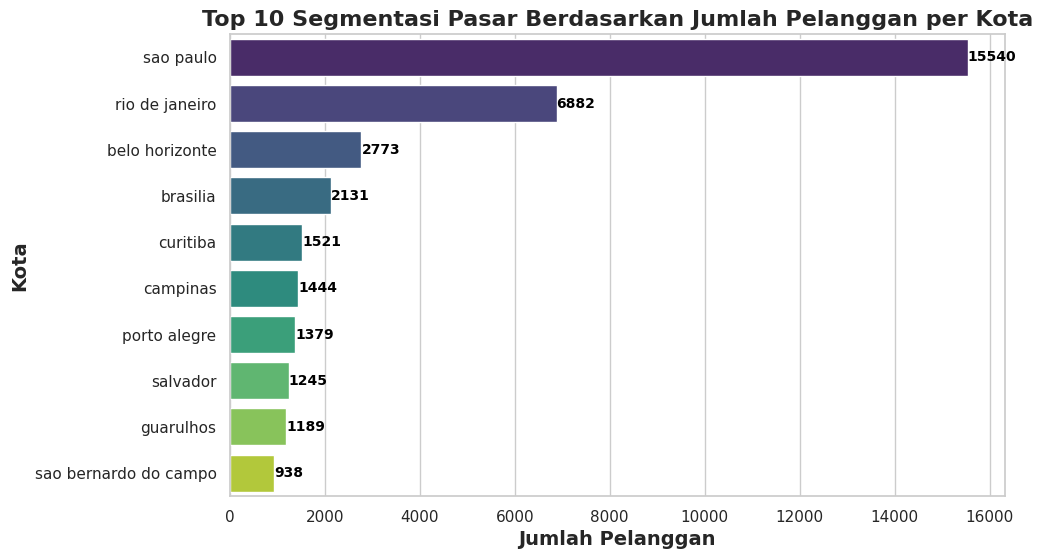

In [66]:
# Melakukan visualisasi segmentasi pasar tertinggi
most_customers = customer.groupby(by='customer_city').agg({'customer_id': 'nunique'}).sort_values(by='customer_id', ascending=False)
most_customers = most_customers.reset_index()

sns.set(style='whitegrid', palette='pastel')

# Plot bar untuk analisis segmentasi pasar tertinggi
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='customer_id', y='customer_city', data=most_customers.head(10),
                      hue='customer_city', palette='viridis', legend=False)

for p in barplot.patches:
    barplot.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                     ha='left', va='center', color='black', fontsize=10, fontweight='bold')

plt.title('Top 10 Segmentasi Pasar Berdasarkan Jumlah Pelanggan per Kota', fontsize=16, fontweight='bold')
plt.xlabel('Jumlah Pelanggan', fontsize=14, fontweight='bold')
plt.ylabel('Kota', fontsize=14, fontweight='bold')

plt.show()

Dari visualisasi plot segmentasi pasar diatas, Sao Paulo merupakan kota dengan jumlah pelanggan terbanyak, diikuti dengan kota Rio De Janeiro dan Belo Horizonte.

## **Penjualan pada Kategori Produk**

In [67]:
# Menampilkan jumlah penjualan per kategori produk
category = (merged_order_items.groupby(by='product_category_name_english')['product_id']
               .count()
               .reset_index()
               .rename(columns={'product_category_name_english': 'category', 'product_id': 'orders'}))

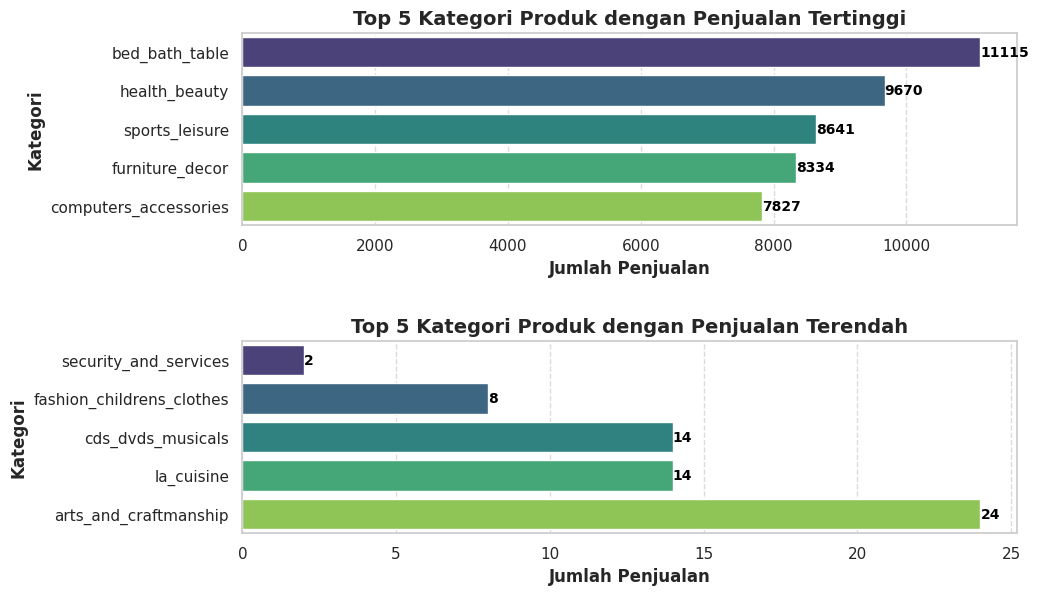

In [68]:
# Melakukan visualisasi penjualan tertinggi dan terendah
category_sorted = category.sort_values(by='orders', ascending=False)

# Memilih 5 kategori teratas dan terbawah
top_categories = category_sorted.head(5)
bottom_categories = category_sorted.tail(5)
sns.set(style='whitegrid', palette='pastel')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6.5))

# Plot kategori penjualan teratas
sns.barplot(x='orders', y='category', data=top_categories, ax=ax1,
            hue='category', palette='viridis', legend=False)
ax1.set_title('Top 5 Kategori Produk dengan Penjualan Tertinggi', fontsize=14, fontweight='bold')
ax1.set_xlabel('Jumlah Penjualan', fontsize=12, fontweight='bold')
ax1.set_ylabel('Kategori', fontsize=12, fontweight='bold')
ax1.grid(axis='x', linestyle='--', alpha=0.7)

# Plot kategori penjualan terendah
sns.barplot(x='orders', y='category', data=bottom_categories, ax=ax2, order=bottom_categories['category'][::-1],
            hue='category', palette='viridis_r', legend=False)
ax2.set_title('Top 5 Kategori Produk dengan Penjualan Terendah', fontsize=14, fontweight='bold')
ax2.set_xlabel('Jumlah Penjualan', fontsize=12, fontweight='bold')
ax2.set_ylabel('Kategori', fontsize=12, fontweight='bold')
ax2.grid(axis='x', linestyle='--', alpha=0.7)

for ax in [ax1, ax2]:
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center', color='black', fontsize=10, fontweight='bold')

plt.subplots_adjust(hspace=0.6)

plt.show()

Dari visualisasi plot diatas, kategori produk dengan penjualan tertinggi ada pada kategori produk Bed, Bath, Table diikuti dengan Health, Beauty dan Sports Leisure. Sedangkan kategori produk dengan penjualan terendah ada pada kategori produk Security and Services diikuti dengan Fashion, Childrens, Clothes dan CDS, DVDs, Musicals.

## **Jumlah Pesanan per Bulan**

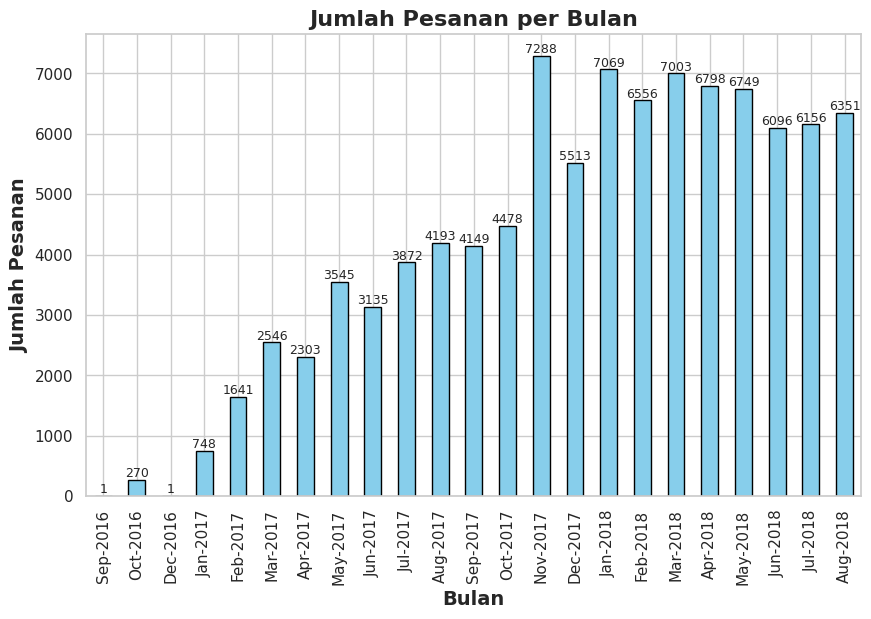

In [69]:
# Melakukan visualisasi jumlah pesanan per bulan
orders_date['formatted_month'] = orders_date['month'].dt.strftime('%b-%Y')   # mengubah format bulan

orders_date.plot(kind='bar', x='formatted_month', y='order_id', figsize=(10, 6),
                 legend=False, color='skyblue', edgecolor='black')

plt.title('Jumlah Pesanan per Bulan', fontsize=16, fontweight='bold')
plt.xlabel('Bulan', fontsize=14, fontweight='bold')
plt.ylabel('Jumlah Pesanan', fontsize=14, fontweight='bold')

for index, value in enumerate(orders_date['order_id']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=9)

plt.show()

Diketahui dari visualisasi diatas, jumlah pesanan tertinggi ada pada bulan November 2017 yaitu sebanyak 7288 pesanan.

## **Tipe pembayaran**

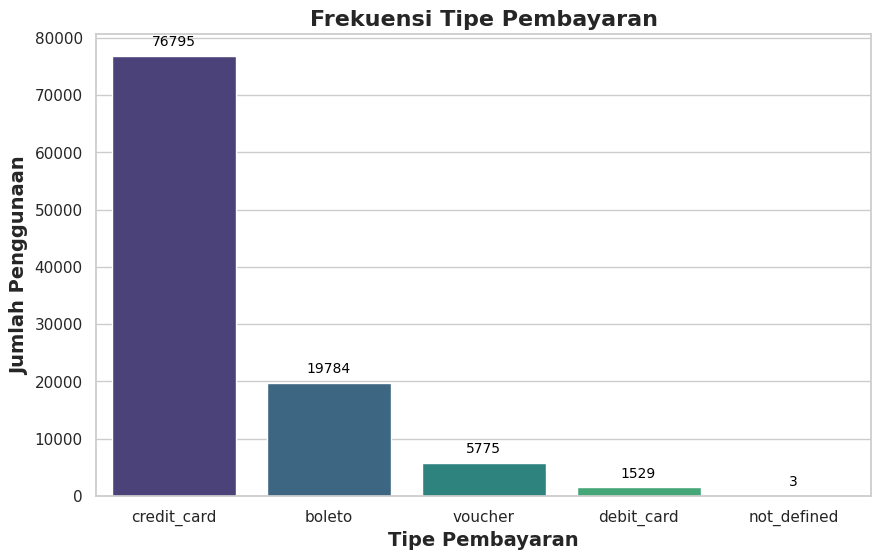

In [70]:
# Melakukan visualisasi tipe pembayaran yang sering digunakan
sns.set(style='whitegrid', palette='muted')

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=order_payments['payment_type'].value_counts().index, y=order_payments['payment_type'].value_counts(),
                      hue=order_payments['payment_type'].value_counts().index, palette='viridis', legend=False)

for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                     fontsize=10, color='black')

plt.title('Frekuensi Tipe Pembayaran', fontsize=16, fontweight='bold')
plt.xlabel('Tipe Pembayaran', fontsize=14, fontweight='bold')
plt.ylabel('Jumlah Penggunaan', fontsize=14, fontweight='bold')

plt.show()

Dari visualisasi diatas, tipe pembayaran Credit Card merupakan tipe pembayaran yang paling sering digunakan.

# **Explanatory Analysis**

### **Bagaimana segmentasi pasar berdasarkan wilayah geografis?**

Berdasarkan hasil grafik Segmentasi Pasar, Sao Paulo adalah kota dengan jumlah pelanggan terbanyak, diikuti oleh Rio de Janeiro dan Belo Horizonte.

Tingginya jumlah pelanggan di ketiga wilayah tersebut menunjukkan potensi yang besar untuk pengembangan bisnis atau peningkatan pelayanan. Hal ini dapat dilakukan dengan berbagai cara, seperti meningkatkan strategi promosi, pemasaran yang lebih intensif, atau menyediakan layanan khusus.

Sedangkan wilayah lain dengan jumlah pelanggan yang masih sedikit dapat dilakukan peningkatan promosi di wilayah tersebut. Hal ini dapat dilakukan dengan memasang iklan di media massa lokal, mempromosikan produk melalui media sosial lokal, atau mengadakan event khusus di wilayah tersebut.

### **Kategori barang apa yang paling sering dibeli oleh pelanggan, dan bagaimana solusi terhadap kategori produk yang paling jarang dibeli?**

Berdasarkan hasil analisis data, dapat diketahui bahwa Bed, Bath, Table merupakan kategori produk yang paling banyak dibeli, sedangkan kategori produk Security and Service adalah kategori yang paling sedikit dibeli. Hal ini menunjukkan bahwa pelanggan lebih tertarik untuk membeli produk-produk yang berkaitan dengan kebutuhan sehari-hari, seperti perlengkapan tidur, perlengkapan mandi, dan perlengkapan rumah tangga.

Berdasarkan informasi ini, solusi yang dapat dilakukan adalah:

- Meningkatkan promosi untuk produk-produk di kategori Security and Service. Hal ini dapat dilakukan dengan berbagai cara, seperti memasang iklan di media massa mengenai pentingnya keamanan, mempromosikan produk melalui media sosial, atau mengadakan event khusus untuk mempromosikan produk.
- Melakukan riset pasar untuk mengetahui kebutuhan pelanggan di kategori Security and Service. Hal ini dapat dilakukan dengan melakukan survei kepada pelanggan, mengadakan focus group discussion, atau menganalisis data penjualan.
- Menawarkan produk-produk di kategori Security and Service dengan harga yang lebih kompetitif. Hal ini dapat menarik minat pelanggan untuk membeli produk-produk di kategori tersebut.

### **Pada bulan apa terjadi peningkatan pembelian tertinggi oleh pelanggan dan apa yang mungkin menyebabkan hal itu dapat terjadi?**

Berdasarkan hasil grafik Jumlah Pesanan per Bulan, diketahui pembelian terbanyak terjadi pada tanggal 24 November 2017. Hal ini menunjukkan bahwa ada suatu momen atau peristiwa yang menyebabkan peningkatan penjualan pada periode tersebut.

Berdasarkan informasi tersebut dapat dilakukan peningkatan promosi untuk produk-produk yang berkaitan dengan momen atau peristiwa tersebut. Hal ini dapat dilakukan dengan berbagai cara, seperti memasang iklan di media massa, mempromosikan produk melalui media sosial, atau mengadakan event khusus untuk mempromosikan produk.

### **Tipe pembayaran apa yang paling sering atau disukai oleh pelanggan saat melakukan transaksi dan bagaimana peningkatan layanan tersebut agar pelanggan lebih nyaman dalam melakukan transaksi?**

Dari informasi yang didapatkan pada grafik Tipe Pembayaran, terlihat bahwa penggunaan kartu kredit sebagai metode pembayaran mendominasi. Oleh karena itu, penyediaan fasilitas yang memudahkan pembayaran dengan kartu kredit dapat ditingkatkan, seperti:

- Menawarkan berbagai pilihan kartu kredit yang dapat diterima, termasuk kartu kredit dari berbagai bank dan lembaga keuangan.
- Mempermudah proses otorisasi kartu kredit.
- Perusahaan dapat bekerja sama dengan berbagai bank dan lembaga keuangan untuk memberikan diskon atau promo khusus bagi pelanggan yang menggunakan kartu kredit dari mitra tersebut.